## Basics of a matplotlib plot

How to set up a figure, add axes, and plot data.

<br>
First, import numpy and matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# when using notebooks, it is useful to put global imports, definitions that will be used throughout the notebook 
# in a cell near the top, so that it only needs to be run once at the beginning.
# don't forget to rerun it if you need to restart the notebook!

# we could also put change settings here, for example, to set the default fontsize in every graph in the notebook, etc.

Figure objects are created using plt.figure(), and then we can add an axes object using the add_subplot() method.

Data is plotted using the axes method .plot() which returns a list of objects representing the plotted lines.

The figure is drawn by calling plt.show()

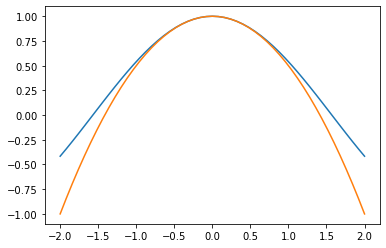

In [3]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(111)                                    #111 = 1 row, 1 column, 1st axes

x1 = np.linspace(-2, 2, 51)

line_cosine, = ax1.plot(x1, np.cos(x1))                        # cos (x)
line_taylor, = ax1.plot(x1, 1.0 - x1**2/2)                     # Taylor approx.

plt.show()


In the above example, we gave everything a name. 

This is is good practice: it allows us to easily change the properties of the different elements of the plot later.

However, it is not strictly necessary.
We could have achieved a similar output using a more minimal approach, and without explicitly adding an axes object:


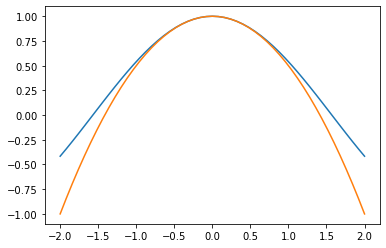

In [4]:
# Minimalist approach
plt.figure()
plt.plot(x1, np.cos(x1))                        
plt.plot(x1, 1.0 - x1**2/2)                     
plt.show()

<br><br>

## Basic customisation

How to change line properties, axes properties, titles, legends etc.

Almost any imaginable property can be changed using additional arguments within ax.plot(), or by calling methods associated with the figure, axes or individual elements

Useful: use ? and tab to view possible options

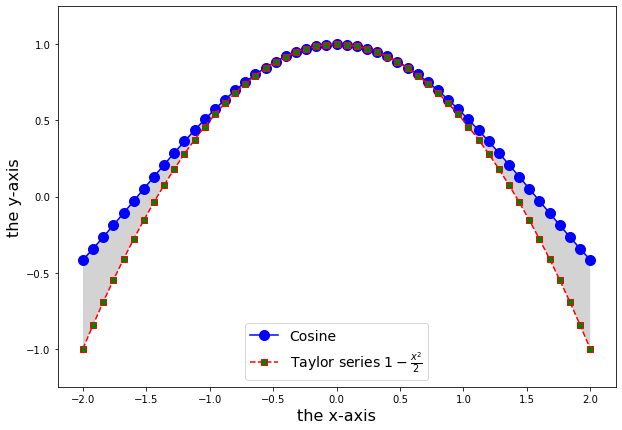

In [6]:
fig3 = plt.figure(figsize=(10,7), facecolor='white')

ax3 = fig3.add_subplot(111, facecolor="white")                                    

# changing line or marker properties within ax.plot()
# ax.plot has a number of optional arguments []
# ax.plot( [x], y, [fmt], [**kwargs])
# fmt ("format") allows basic line and symbol types to be set using shortcuts
# kwargs ("keyword arguments") allow you to set properties using property = value


# setting line properties using the fmt shortcuts
line_cosine3, = ax3.plot(x1, np.cos(x1), 'b-o', label='Cosine')                 # b = blue; - = solid line; o = circular marker

# setting line properties using keyword arguments
line_taylor3, = ax3.plot(x1, 1.0 - x1**2/2, linestyle='dashed', color='red', marker='s', markerfacecolor="green") 


# line properties can also be set using a series of .set_ methods
line_taylor3.set_label('Taylor series '+r'$1 - \frac{x^2}{2}$')             #note use of Latex
line_cosine3.set_markersize(10)

#fill between two curves
ax3.fill_between(x1, 1.0 - x1**2/2, np.cos(x1), facecolor='lightgrey')


# axes properties - usually changed using ax.set_.....
ax3.set_ylabel('the y-axis', fontsize=16)
ax3.set_xlabel('the x-axis', fontsize=16)
ax3.set_ylim(-1.25, 1.25)                         #range of y-axis
ax3.set_xticks(np.linspace(-2.0, 2.0, 9))         #specify tick positions on the x-axis
#ax3.set_yticklabels([])                          #remove labels from the y-axis (or set specific strings)

# show the legend (for every object with a label)
ax3.legend(fontsize=14, loc='lower center')

plt.show()

#save a figure to file
fig3.savefig('figure3.png', bbox_inches='tight', dpi=2000)



Note that line properties such as markersize, color, etc do not need to be fixed.
Using plt.scatter(), instead of plt.plot() allows marker properties to be set individually

You can pass an array or list of values -- this is useful for creating scatter plots where the size / shape / color of the marker also contains information about a third dimension

ax.text() and ax.annotate() can be used to add text, or text and arrow, to the plot

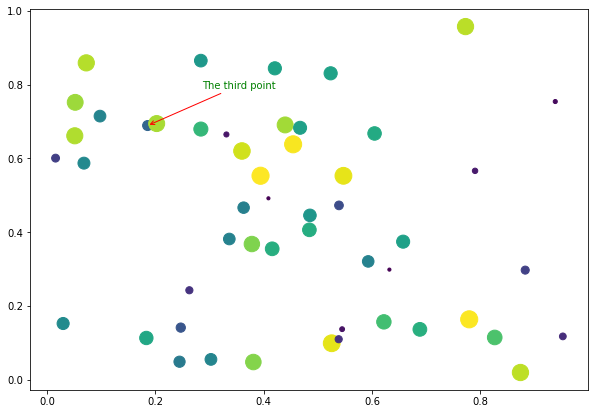

In [8]:
fig4 = plt.figure(figsize=(10,7))

ax4 = fig4.add_subplot(111)                                    


x4 = np.random.rand(51)
y4 = np.random.rand(51)
z4 = 300*np.random.rand(51)

ax4.scatter(x4, y4, s=z4, c=z4)       #scatter has slightly different notation: s is markersize (ms or markersize in plt.plot)


#annotating - note that arrowprops accepts a dictionary 
ax4.annotate('The third point', xy=(x4[2], y4[2]), xytext=(x4[2]+0.1, y4[2]+0.1), arrowprops={'arrowstyle':'->', 'color':'red'}, color='green')

plt.show()

## Exercise:

How do you insert gridlines? logarithmic axes? error bars?

Use the examples on matplotlib.org for inspiration...

<br>
<br>

## Multiple subplots

The .add_subplot(abc) or .add_subplot(a,b,c) method can be used to add multiple subplots to a single figure.

In this notation a is the total number of rows, b is the total number of columns, and c is the index of the subplot

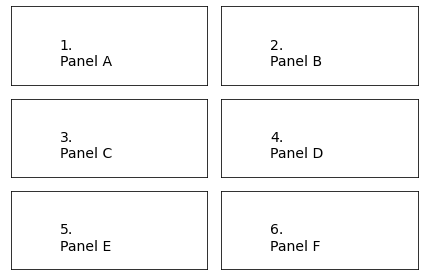

In [9]:
fig5 = plt.figure()

letters = [['A', 'B'], ['C', 'D'], ['E', 'F']]

numrows, numcols = 3,2

for row in range(numrows):
    for col in range(numcols):
        ax = fig5.add_subplot(numrows, numcols, (row)*numcols + col + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(0.25, 0.25, str((row)*numcols + col + 1)+'.\nPanel '+letters[row][col], fontsize=14)
        
fig5.tight_layout()  #arranges the subplots so they don't overlap

#fig5.subplots_adjust can be used to manually adjust spacing and size
plt.show()


Note that we do not need to use the same a,b,c for each subplot...

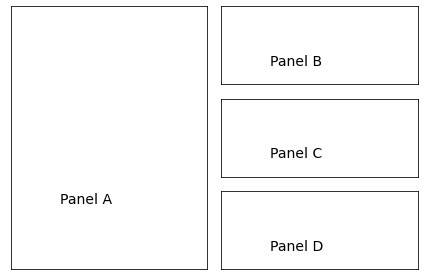

In [10]:
fig6 = plt.figure()

letters2 = ['A', 'B','C', 'D']

ax = fig6.add_subplot(1, 2, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.text(0.25, 0.25, 'Panel '+letters2[0], fontsize=14)

for row in range(3):
        ax = fig6.add_subplot(3, 2, (row)*2 + 2)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.text(0.25, 0.25, 'Panel '+letters2[row+1], fontsize=14)
        
fig6.tight_layout() 
plt.show()

Can also use plt.subplots() instead of plt.figure() to define a table of subplots.

Note that here the figure and axes objects are created together

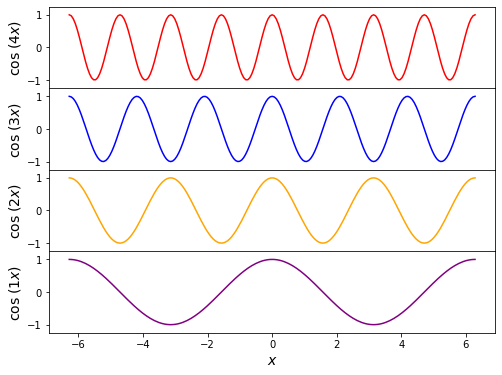

In [11]:
nrows=4
fig7, axes = plt.subplots(nrows, figsize=(8,nrows*1.5))     #creates a figure and a list of axes

fig7.subplots_adjust(hspace=0)       #no vertical space between subplots

x7=np.linspace(-2*np.pi, 2*np.pi, 201)

colors=['red', 'blue', 'orange', 'purple']

for i in range(nrows):
    n = nrows - i      #useful index: n=1 for bottom, n=nrows for the top
    axes[i].plot(x7, np.cos(n*x7), color=colors[i%len(colors)])
    axes[i].set_ylim(-1.25, 1.25)
    axes[i].set_ylabel(r'$\cos \;('+str(n)+'x)$', fontsize=14)
    
    if i == nrows -1:
        axes[i].set_xlabel(r'$x$', fontsize=14)
    
plt.show()



Note that matplotlib also has a range of more complicated tools for subplot placement (GridSpec, etc.)